# Spam Message Classification

# 1) Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.tsv' , sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isna().sum()

,0
label,0
message,0
length,0
punct,0


In [6]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


# 2) Building the Model (Random Forest)

In [7]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [8]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


In [9]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [11]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [12]:
ham = ham.sample(spam.shape[0])

In [13]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [16]:
data = pd.concat([ham, spam], ignore_index=True)

In [17]:
data.shape

(1494, 4)

In [18]:
data['label'].value_counts()

,count
label,
ham,747
spam,747


In [19]:
data.head()

,label,message,length,punct
0,ham,Can you tell Shola to please go to college of ...,408,6
1,ham,You've always been the brainy one.,34,2
2,ham,The fact that you're cleaning shows you know w...,133,9
3,ham,"Happy or sad , one thing about past is- ""Its n...",74,11
4,ham,Ok ill send you with in &lt;DECIMAL&gt; ok.,45,5


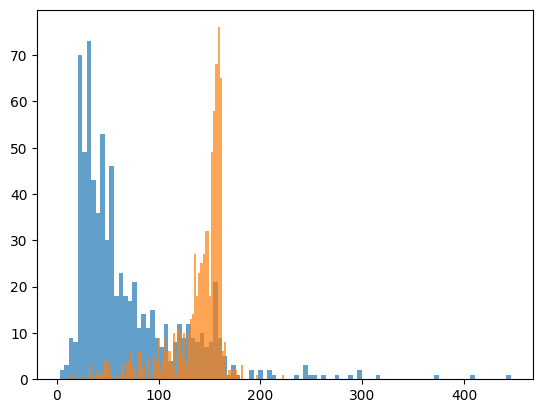

In [26]:
plt.hist(data[data['label'] == 'ham']['length'], bins=100, alpha=0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins=100, alpha=0.7)
plt.show()

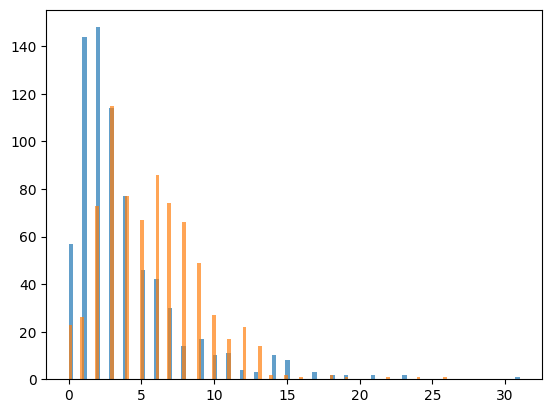

In [27]:
plt.hist(data[data['label'] == 'ham']['punct'], bins=100, alpha=0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins=100, alpha=0.7)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=0,shuffle=True)

In [30]:
X_train.shape, X_test.shape

((1045,), (449,))

# 2) Building the Model (Random Forest)


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [33]:
from os import pipe
classifier = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=10))
])

In [34]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

# 3) Predicting the results (Random Forest)

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
y_test, y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham',
        'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spa

In [37]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [38]:
accuracy_score(y_test, y_pred)

0.9265033407572383

In [42]:
print(confusion_matrix(y_test, y_pred))

[[217  10]
 [ 23 199]]


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.96      0.93       227
        spam       0.95      0.90      0.92       222

    accuracy                           0.93       449
   macro avg       0.93      0.93      0.93       449
weighted avg       0.93      0.93      0.93       449



# 4) Building the Model (SVM)

In [43]:
from sklearn.svm import SVC

In [44]:
from os import pipe
svm = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', SVC(C= 100, gamma = 'auto'))
])

In [45]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

# 5) Predicting the results (SVM)

In [46]:
y_pred = svm.predict(X_test)

In [47]:
accuracy_score(y_test, y_pred)

0.9420935412026726

In [48]:
print(confusion_matrix(y_test, y_pred))

[[221   6]
 [ 20 202]]


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.97      0.94       227
        spam       0.97      0.91      0.94       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [50]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [51]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [52]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
